In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.676784,-0.574685,-0.958796,-0.486543,0.380882,-0.512797,0.936307,0.452792,-0.825528,-0.504054,-0.969495,0
1,0.151470,1.740083,-0.229040,0.260218,-1.024946,-0.512797,0.936307,-0.580188,-0.825528,-1.372897,1.024518,1
2,0.199419,-0.574685,-0.958796,0.888249,-0.030683,-0.512797,-1.161311,-1.102475,-0.825528,-0.504054,-0.969495,0
3,1.595826,1.740083,1.448842,0.626765,0.356164,-0.512797,0.936307,-1.347082,1.211346,-0.873570,1.024518,1
4,-0.156582,-0.574685,-0.229040,1.635011,-1.245251,-0.512797,0.936307,0.577084,-0.825528,-0.504054,-0.969495,0


In [4]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,-0.676784,-0.574685,-0.958796,-0.486543,0.380882,-0.512797,0.936307,0.452792,-0.825528,-0.504054,-0.969495
1,0.151470,1.740083,-0.229040,0.260218,-1.024946,-0.512797,0.936307,-0.580188,-0.825528,-1.372897,1.024518
2,0.199419,-0.574685,-0.958796,0.888249,-0.030683,-0.512797,-1.161311,-1.102475,-0.825528,-0.504054,-0.969495
3,1.595826,1.740083,1.448842,0.626765,0.356164,-0.512797,0.936307,-1.347082,1.211346,-0.873570,1.024518
4,-0.156582,-0.574685,-0.229040,1.635011,-1.245251,-0.512797,0.936307,0.577084,-0.825528,-0.504054,-0.969495
...,...,...,...,...,...,...,...,...,...,...,...
4039,0.363621,1.740083,-0.229040,-1.233305,0.150382,-0.512797,0.936307,1.364186,-0.825528,-0.873570,1.024518
4040,0.459521,1.740083,-0.229040,1.254797,1.296752,-0.512797,-1.161311,-0.883986,-0.825528,0.824135,1.024518
4041,-0.724734,-0.574685,-0.834806,-1.494789,1.796332,-0.512797,-1.161311,-0.476105,1.211346,-0.504054,-0.985474
4042,-0.464633,-0.574685,1.448842,0.260218,0.532592,-0.512797,0.936307,-0.759694,-0.825528,-0.504054,-0.985474


In [5]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2499
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

accuracies_nb:  [0.6662087912087912, 0.6789245982694685, 0.6806782055810667, 0.688504326328801, 0.6819980217606331, 0.6953028430160693, 0.7125205930807249, 0.7218788627935723, 0.6987654320987654]
positive_predictive_values_nb:  [0.7298550724637681, 0.7281077770973668, 0.7275280898876404, 0.7364152473641524, 0.7389597644749755, 0.7482185273159145, 0.767515923566879, 0.7780373831775701, 0.784037558685446]
recalls_nb:  [0.62699203187251, 0.6664798206278026, 0.6675257731958762, 0.678117998506348, 0.6663716814159292, 0.6915477497255763, 0.7036496350364964, 0.7192224622030238, 0.6872427983539094]
f1_scores_nb:  [0.674524511117064, 0.6959321041849575, 0.696236559139785, 0.7060653188180405, 0.7007910656119125, 0.7187678265830005, 0.7341964965727342, 0.7474747474747475, 0.7324561403508771]
specificities_nb:  [0.7144607843137255, 0.6942148760330579, 0.6966379984362784, 0.7012867647058824, 0.7017937219730942, 0.7001414427157001, 0.724007561436673, 0.7254335260115607, 0.7160493827160493]
npvs_nb: 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 200
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.717032967032967, 0.7475278121137207, 0.7954786294595549, 0.8236505974454058, 0.8605341246290801, 0.8788627935723115, 0.8937397034596376, 0.8936959208899876, 0.9160493827160494]
positive_predictive_values_dtc:  [0.7560462670872765, 0.7747851002865329, 0.8135922330097087, 0.8351810790835181, 0.8692170818505338, 0.8851351351351351, 0.8953846153846153, 0.8917647058823529, 0.9223300970873787]
recalls_dtc:  [0.717564870259481, 0.7612612612612613, 0.812015503875969, 0.846441947565543, 0.8785971223021583, 0.8931818181818182, 0.9051321928460342, 0.9045346062052506, 0.9134615384615384]
f1_scores_dtc:  [0.7363031233998976, 0.7679636466912809, 0.8128031037827352, 0.8407738095238095, 0.8738819320214669, 0.8891402714932126, 0.9002320185614849, 0.8981042654028436, 0.9178743961352657]
specificities_dtc:  [0.7163814180929096, 0.7308219178082191, 0.7755261106780982, 0.7957875457875457, 0.8384615384615385, 0.8617886178861789, 0.8809106830122592, 0.882051282051282, 0.9187817258883249]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1694
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

accuracies_rf:  [0.7456043956043956, 0.8186032138442522, 0.8470505121865065, 0.8891635764318088, 0.9015825914935707, 0.92336217552534, 0.9266886326194399, 0.9381953028430161, 0.9555555555555556]
positive_predictive_values_rf:  [0.7331583552055994, 0.8173540439207284, 0.8516896120150188, 0.8867647058823529, 0.9125338142470695, 0.9282560706401766, 0.930576070901034, 0.9349240780911063, 0.9531914893617022]
recalls_rf:  [0.8413654618473896, 0.8611738148984198, 0.8741168914579319, 0.9129447388342165, 0.9084380610412927, 0.9344444444444444, 0.9375, 0.9556541019955654, 0.9696969696969697]
f1_scores_rf:  [0.7835437120149603, 0.8386919483374553, 0.8627575277337559, 0.8996643043640433, 0.9104813315339632, 0.9313399778516057, 0.9340252038547072, 0.9451754385964912, 0.9613733905579399]
specificities_rf:  [0.6298543689320388, 0.7670765027322405, 0.8139717425431711, 0.8607594936708861, 0.8931718061674009, 0.9094707520891365, 0.9132841328413284, 0.9162011173184358, 0.9367816091954023]
npvs_rf:  [0.76

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1868
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


accuracies_knn:  [0.6543956043956044, 0.6619283065512979, 0.6743200282585659, 0.6901524515863205, 0.7210682492581603, 0.7286773794808405, 0.729818780889621, 0.7490729295426453, 0.7604938271604939]
positive_predictive_values_knn:  [0.6906735751295336, 0.684152401987852, 0.6971830985915493, 0.7051094890510949, 0.7390158172231986, 0.740343347639485, 0.748546511627907, 0.7760532150776053, 0.7665198237885462]
recalls_knn:  [0.668505516549649, 0.7035775127768313, 0.7080624187256177, 0.7351598173515982, 0.7590252707581228, 0.7779030439684329, 0.7686567164179104, 0.7743362831858407, 0.7981651376146789]
f1_scores_knn:  [0.6794087665647298, 0.6937290033594625, 0.7025806451612904, 0.7198211624441133, 0.748886910062333, 0.7586586036283672, 0.7584683357879234, 0.7751937984496124, 0.7820224719101123]
specificities_knn:  [0.6373025516403402, 0.6122033898305085, 0.634184068058778, 0.6370170709793351, 0.675054704595186, 0.6689466484268126, 0.6819852941176471, 0.7170868347338936, 0.7165775401069518]
npv

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 457
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

accuracies_svm:  [0.689010989010989, 0.6909765142150803, 0.7011656658424585, 0.7058096415327565, 0.7161226508407518, 0.7249690976514215, 0.7471169686985173, 0.7688504326328801, 0.7654320987654321]
positive_predictive_values_svm:  [0.6897163120567376, 0.6891495601173021, 0.7016449234259784, 0.6985769728331177, 0.7103781174577635, 0.7141393442622951, 0.743448275862069, 0.7724288840262582, 0.8051948051948052]
recalls_svm:  [0.7826961770623743, 0.7948139797068771, 0.7944765574823378, 0.8132530120481928, 0.804922515952598, 0.8076477404403245, 0.8166666666666667, 0.8096330275229358, 0.788135593220339]
f1_scores_svm:  [0.7332704995287465, 0.7382198952879581, 0.7451807228915662, 0.7515657620041754, 0.7547008547008547, 0.758020663404024, 0.7783393501805054, 0.7905935050391937, 0.7965738758029979]
specificities_svm:  [0.576271186440678, 0.5649794801641587, 0.5871271585557299, 0.5759781619654231, 0.6108108108108108, 0.6304635761589404, 0.6642599277978339, 0.7211796246648794, 0.7337278106508875]
n

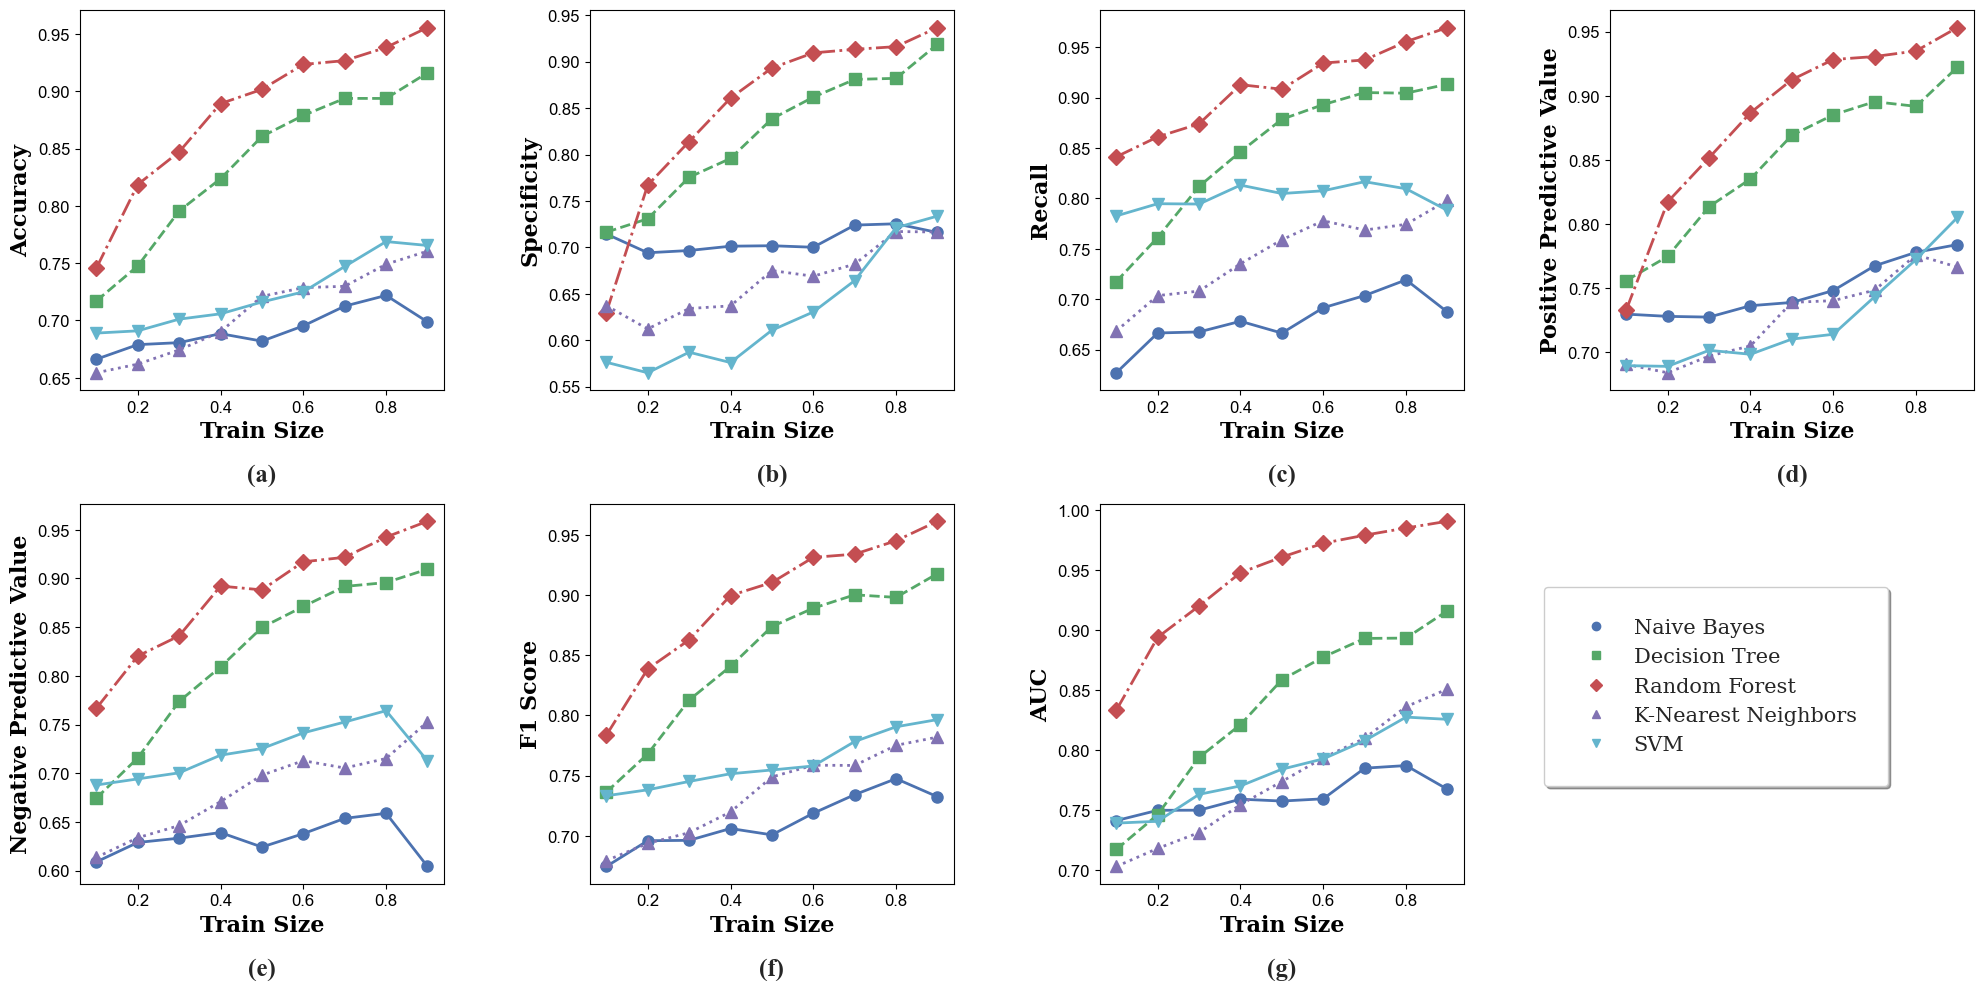

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for 2x4 layout
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].text(0.5, -0.24, '(a)', transform=axes[0, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].text(0.5, -0.24, '(b)', transform=axes[0, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].text(0.5, -0.24, '(c)', transform=axes[0, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[0, 3].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 3].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].set_ylabel('Positive Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].text(0.5, -0.24, '(d)', transform=axes[0, 3].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 0].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Negative Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].text(0.5, -0.24, '(e)', transform=axes[1, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 1].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('F1 Score', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].text(0.5, -0.24, '(f)', transform=axes[1, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[1, 2].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('AUC', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].text(0.5, -0.24, '(g)', transform=axes[1, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Hide the last unused subplot
axes[1, 3].axis('off')

# Create a dummy plot for the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(0.96, 0.1), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 15, 'family': 'serif'})
dummy_plot.axis('off')

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('Images/11_SP_ml_classifier_metrics_2x4.png', transparent=True)
plt.show()

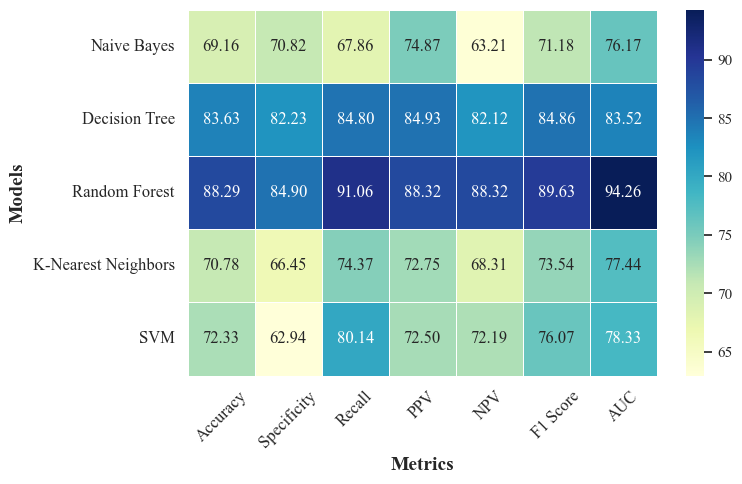

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Times New Roman as the default font
plt.rcParams.update({"font.family": "Times New Roman"})

# Example performance metrics
models = ["Naive Bayes", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "SVM"]

# Replace these lists with your actual performance metrics
data = {
    "Accuracy": [
        sum(accuracies_nb) * 100 / 9,
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
        sum(accuracies_knn) * 100 / 9,
        sum(accuracies_svm) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_nb) * 100 / 9,
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
        sum(specificities_knn) * 100 / 9,
        sum(specificities_svm) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_nb) * 100 / 9,
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
        sum(recalls_knn) * 100 / 9,
        sum(recalls_svm) * 100 / 9,
    ],
    "PPV": [
        sum(positive_predictive_values_nb) * 100 / 9,
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
        sum(positive_predictive_values_knn) * 100 / 9,
        sum(positive_predictive_values_svm) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_nb) * 100 / 9,
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
        sum(npvs_knn) * 100 / 9,
        sum(npvs_svm) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_nb) * 100 / 9,
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
        sum(f1_scores_knn) * 100 / 9,
        sum(f1_scores_svm) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_nb) * 100 / 9,
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
        sum(aucs_knn) * 100 / 9,
        sum(aucs_svm) * 100 / 9,
    ],
}

# Create a DataFrame
performance_df = pd.DataFrame(data, index=models)

# Round values to 2 decimal places
performance_df = performance_df.round(2)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    performance_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5
)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Models", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("Images/11_SP_ml_model_performance_heatmap_with_ppv_npv.png", transparent=True)
plt.show()


In [13]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) * 100 / 9)
print('dtc: ', sum(accuracies_dtc) * 100 / 9)
print('rf: ', sum(accuracies_rf) * 100 / 9)
print('knn: ', sum(accuracies_knn) * 100 / 9)
print('svm: ', sum(accuracies_svm) * 100 / 9)

Average Accuracy: 
nb:  69.16424082375437
dtc:  83.62857701465238
rf:  88.28673284559872
knn:  70.77697285692834
svm:  72.32726732433653


In [14]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) * 100 / 9)
print('dtc: ', sum(specificities_dtc) * 100 / 9)
print('rf: ', sum(specificities_rf) * 100 / 9)
print('knn: ', sum(specificities_knn) * 100 / 9)
print('svm: ', sum(specificities_svm) * 100 / 9)

Average Specificity: 
nb:  70.82251175935578
dtc:  82.22789821851508
rf:  84.89523917211156
knn:  66.44842336099391
svm:  62.942197080103796


In [15]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) * 100 / 9)
print('dtc: ', sum(recalls_dtc) * 100 / 9)
print('rf: ', sum(recalls_rf) * 100 / 9)
print('knn: ', sum(recalls_knn) * 100 / 9)
print('svm: ', sum(recalls_svm) * 100 / 9)

Average Recall: 
nb:  67.85722167708303
dtc:  84.80212067732282
rf:  91.059272046847
knn:  74.37101908165204
svm:  80.13605855669606


In [16]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) * 100 / 9)
print('dtc: ', sum(positive_predictive_values_dtc) * 100 / 9)
print('rf: ', sum(positive_predictive_values_rf) * 100 / 9)
print('knn: ', sum(positive_predictive_values_knn) * 100 / 9)
print('svm: ', sum(positive_predictive_values_svm) * 100 / 9)

Average PPV: 
nb:  74.87417048926348
dtc:  84.92707016452279
rf:  88.31609155849765
knn:  72.75108089018636
svm:  72.49641328040363


In [17]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) * 100 / 9)
print('dtc: ', sum(npvs_dtc) * 100 / 9)
print('rf: ', sum(npvs_rf) * 100 / 9)
print('knn: ', sum(npvs_knn) * 100 / 9)
print('svm: ', sum(npvs_svm) * 100 / 9)

Average NPV: 
nb:  63.206068128369516
dtc:  82.12145532752274
rf:  88.31931914127735
knn:  68.31207429433076
svm:  72.18868297397574


In [18]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) * 100 / 9)
print('dtc: ', sum(f1_scores_dtc) * 100 / 9)
print('rf: ', sum(f1_scores_rf) * 100 / 9)
print('knn: ', sum(f1_scores_knn) * 100 / 9)
print('svm: ', sum(f1_scores_svm) * 100 / 9)

Average F1-Score: 
nb:  71.18271966503465
dtc:  84.8564063001333
rf:  89.6339203871658
knn:  73.54188552631051
svm:  76.07183476488915


In [19]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) * 100 / 9)
print('dtc: ', sum(aucs_dtc) * 100 / 9)
print('rf: ', sum(aucs_rf) * 100 / 9)
print('knn: ', sum(aucs_knn) * 100 / 9)
print('svm: ', sum(aucs_svm) * 100 / 9)

Average AUC: 
nb:  76.16723132946858
dtc:  83.51500944791893
rf:  94.25835563570234
knn:  77.44363089866476
svm:  78.32973425408534
